In [16]:
import glob
import datetime as dt
import pandas as pd
import seaborn as sns

# Variables
id_day = '996'      # Endnummer Zaehlpunkt fuer Tagstrom
id_night = '997'    # Endnummer Zaehlpunkt fuer Nachtstrom
day_files = []
night_files = []

path = r'/media/data/coding/strom/stromnetzgraz/raw_import/'
all_files = glob.glob(path + "/*.csv")

# Import energy consumption for day measurements
for filename in all_files:
    if id_day in filename:
        day_files.append(filename)
        df_day = pd.concat((pd.read_csv(r,
                                        decimal=',',
                                        header=0,
                                        parse_dates=['date'],
                                        converters={'date': lambda t: dt.datetime.strptime(t, '%Y-%m-%dT%H:%M:%S.%f%z').date()},
                                        names=['date', 'zaehlerstand', '1', '2', 'verbrauch', '3', '4'],
                                        usecols=lambda x: x in ['date', 'zaehlerstand', 'verbrauch'],
                                        )
                            for r in day_files))

        df_day['zaehlerstand'] = df_day['zaehlerstand'].astype(float)
        df_day['verbrauch'] = df_day['verbrauch'].astype(float)
        
# Import energy consumption for night measurements
for filename in all_files:
    if id_night in filename:
        night_files.append(filename)
        df_night = pd.concat((pd.read_csv(r,
                                        decimal=',',
                                        header=0,
                                        parse_dates=['date'],
                                        converters={'date': lambda t: dt.datetime.strptime(t, '%Y-%m-%dT%H:%M:%S.%f%z').date()},
                                        names=['date', 'zaehlerstand', '1', '2', 'verbrauch', '3', '4'],
                                        usecols=lambda x: x in ['date', 'zaehlerstand', 'verbrauch'],
                                        )
                            for r in night_files))

        df_night['zaehlerstand'] = df_night['zaehlerstand'].astype(float)
        df_night['verbrauch'] = df_night['verbrauch'].astype(float)

## clean data

In [39]:
# Night Measurements
#df_night.drop(df_night['verbrauch'].idxmax(), inplace=True)

# Day Measurements
df_day.drop(df_day['verbrauch'].idxmax(), inplace=True)

## plots

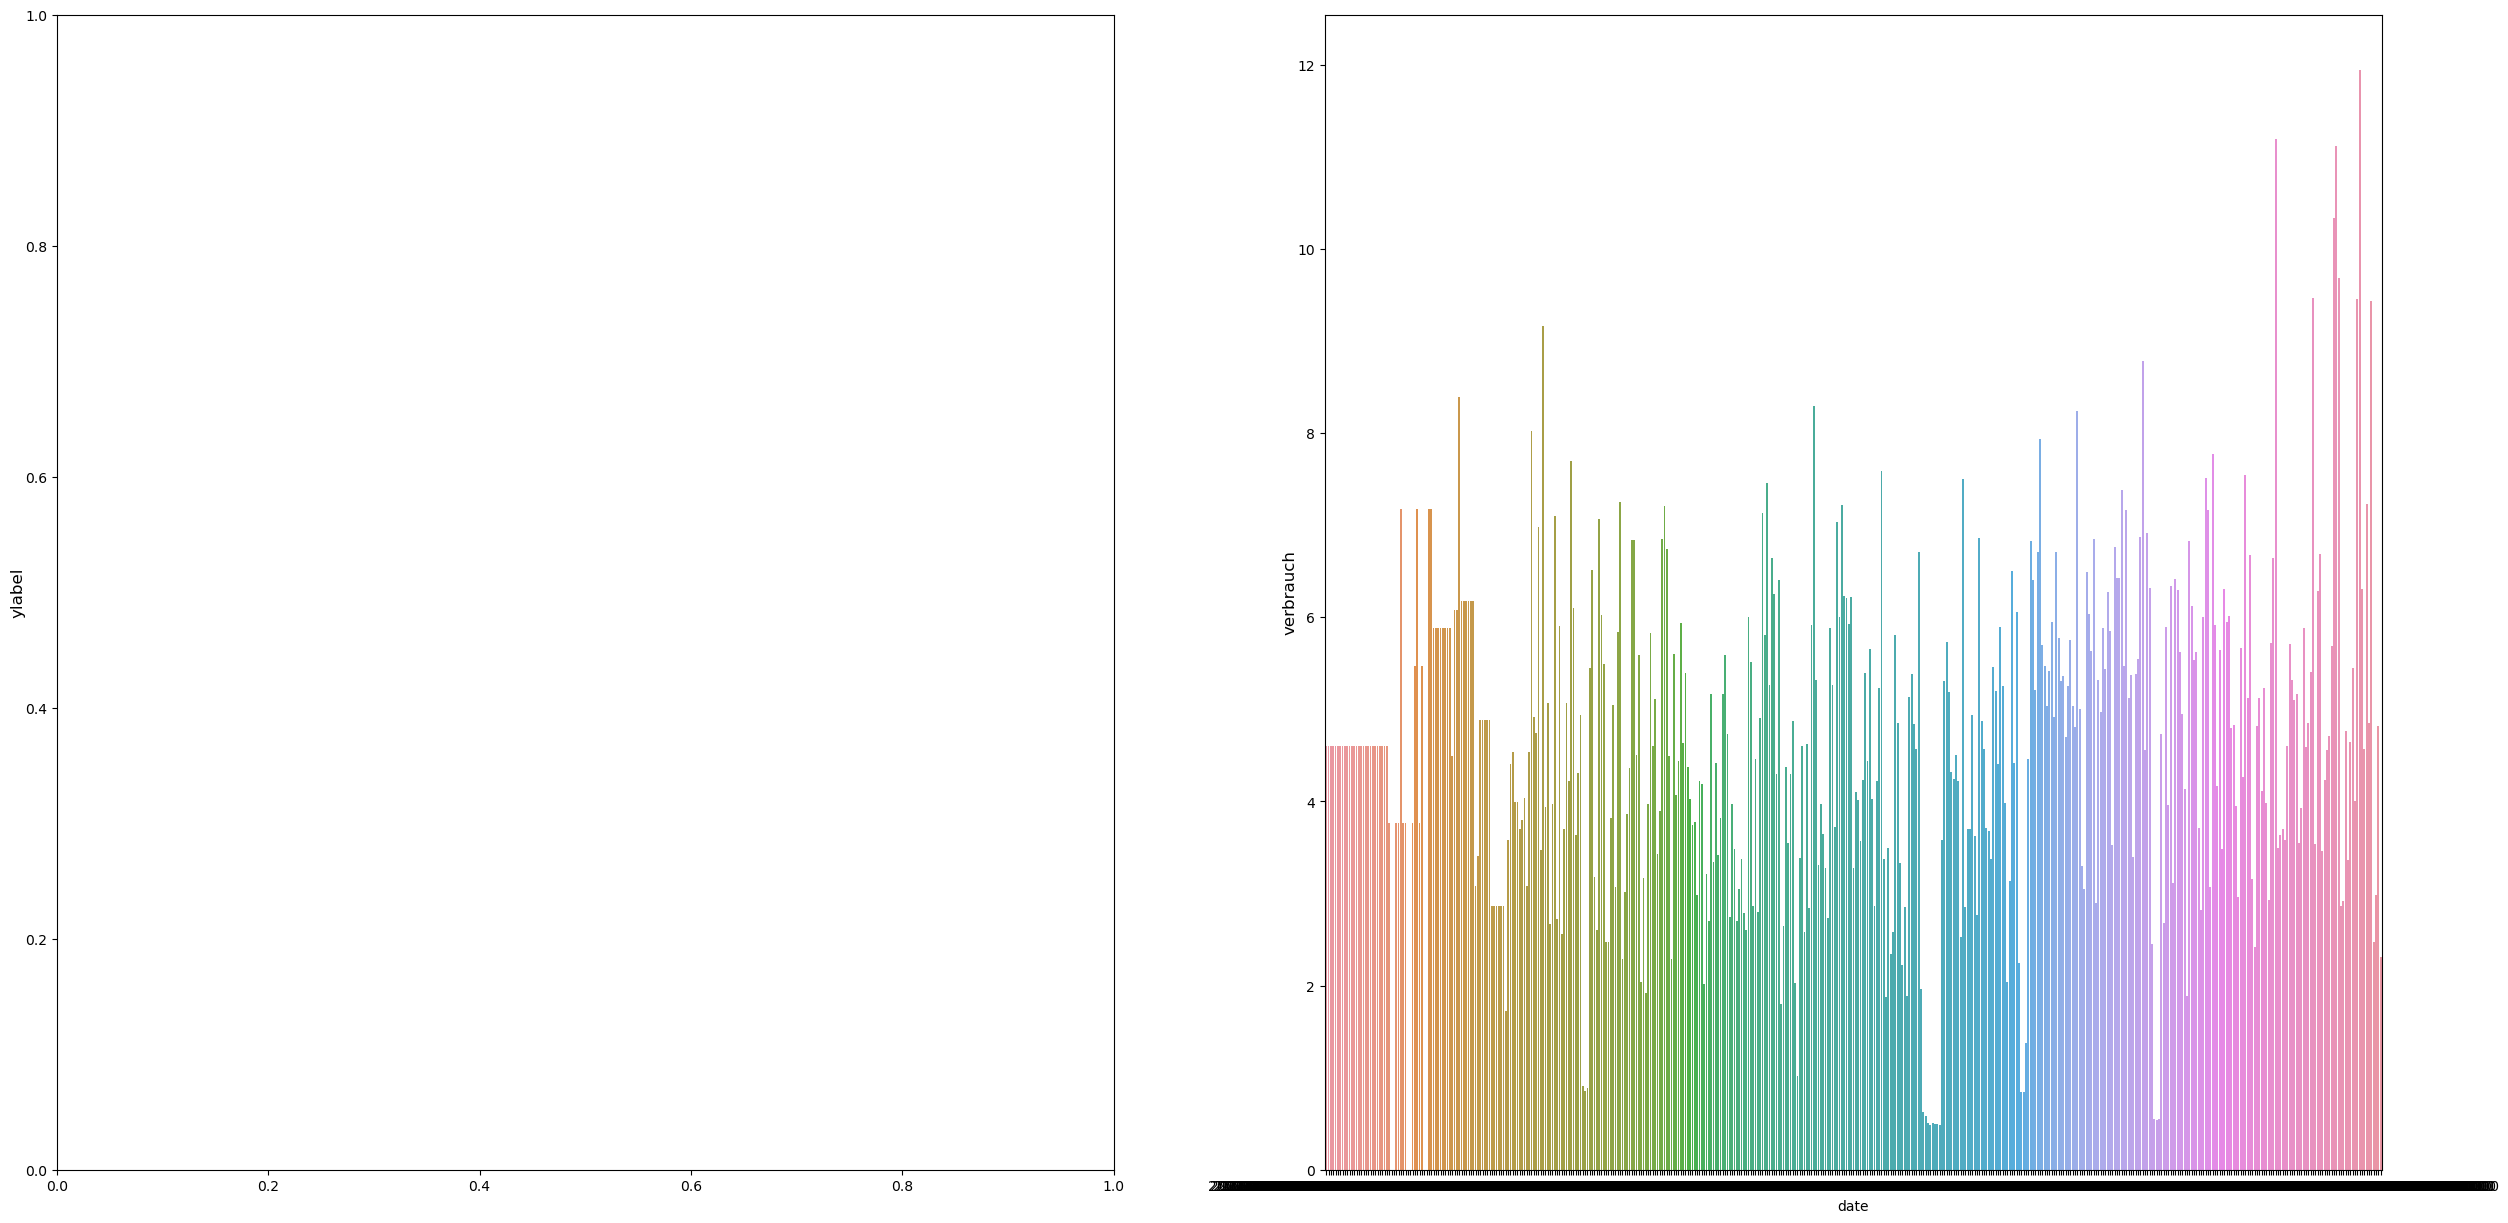

In [46]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


fig = plt.figure(figsize =([30, 15]))

# Gridspec Setup
gs = gridspec.GridSpec(1, 2)
ax = plt.subplot(gs[0, 0])
#gs.update(wspace = 1.5, hspace = 0.3)

ax1 = plt.subplot(gs[0, : 1])
ax1.set_ylabel('ylabel', labelpad = 0, fontsize = 12)

ax2 = plt.subplot(gs[0, 1 : 2])
ax2.set_ylabel('ylabel', labelpad = 0, fontsize = 12)

# ax3 = plt.subplot(gs[0, 4:6])
# ax3.set_ylabel('ylabel', labelpad = 0, fontsize = 12)

# ax4 = plt.subplot(gs[1, 1:3])
# ax4.set_ylabel('ylabel', labelpad = 0, fontsize = 12)

# ax5 = plt.subplot(gs[1, 3:5])
# ax5.set_ylabel('ylabel', labelpad = 0, fontsize = 12)

### Plots
ax1 = sns.barplot(data=df_day,
                  x='date',
                  y='verbrauch')
plt.show()

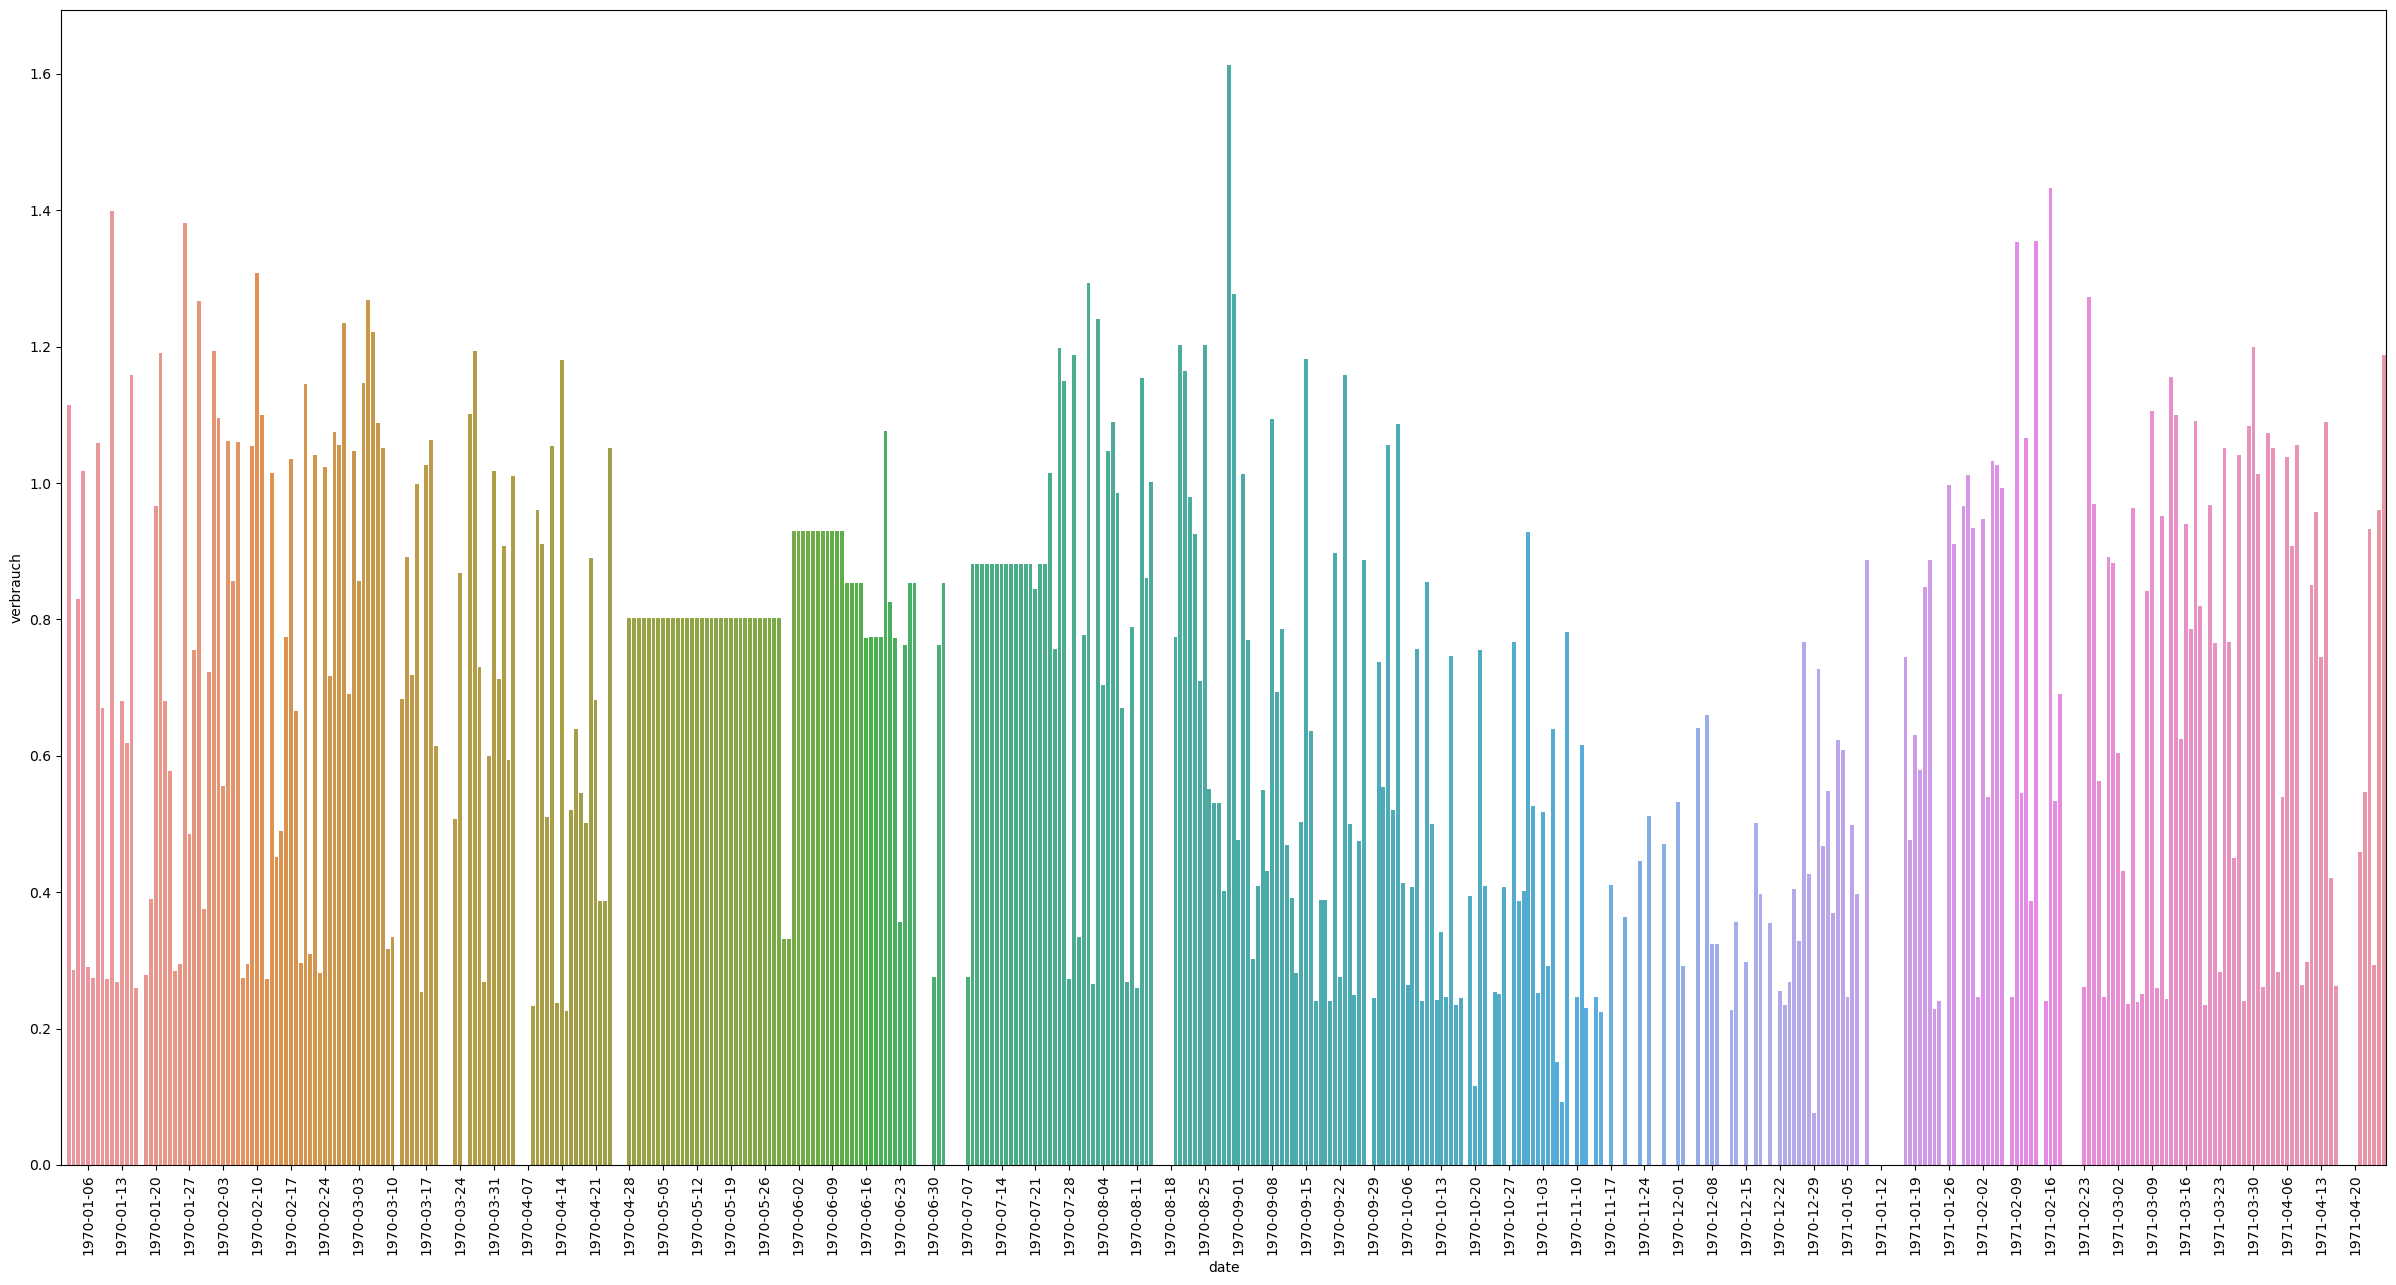

In [33]:
import matplotlib.pyplot as plt
import matplotlib.dates as md

fig, ax=plt.subplots(ncols=1, nrows=1, figsize=(30,15))

sns.barplot(data=df_night,
             x='date',
             y='verbrauch')

# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

plt.show()